<a href="https://colab.research.google.com/github/hellocybernetics/TensorFlow_Eager_Execution_Tutorials/blob/master/tutorials/99_others/learninig_discontinuity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
tf.enable_eager_execution()
L = tf.keras.layers

### 入力データ
入力データは学習データが連続値が５種類、カテゴリ値が１種類、離散値が１種類とする。

In [0]:
X_feature = np.random.randn(100, 5)
X_categorical_feature = np.random.randint(0, 3, 100)[:, np.newaxis]
X_discreat_feature = np.random.randint(0, 4, 100)[:, np.newaxis]

In [0]:
X = np.hstack([X_feature, X_categorical_feature, X_discreat_feature])

In [28]:
df = pd.DataFrame(X, columns=["feature1",
                              "feature2",
                              "feature3",
                              "feature4",
                              "feature5",
                              "categori_feature",
                              "discreate_feature"])
df.head()

,feature1,feature2,feature3,feature4,feature5,categori_feature,discreate_feature
0,0.601079,0.278265,0.196967,-0.226083,-0.231702,1.0,2.0
1,0.441099,1.074026,0.185914,-0.200806,-0.588992,1.0,3.0
2,-0.675723,-0.006905,1.726680,-0.614718,-0.374511,1.0,3.0
3,-0.285753,-0.113059,1.201374,-0.497563,-0.540697,2.0,1.0
4,0.283813,-0.451710,0.244722,-0.545862,-0.405046,2.0,0.0


### カテゴリ値と離散値
例えば、気温が「高い」か「普通」か「低い」かは、「気温」という数値データを離散的に表現したものであると言える。本質的には数値であるものなので、低い方から「１，２，３」を数値を割り当ててしまってもいいかもしれない（数字の並びに意味があれば良い）。

しかし、例えば男・女などの場合「０と１」という並びに意味はなくなる。このようなデータはカテゴリデータとして扱い、入力に使う場合はワン・ホット・エンコーディングをすることが好ましい。

In [0]:
df_transed = pd.get_dummies(df, columns=["categori_feature"], sparse=False)

In [161]:
df_transed.head()

,feature1,feature2,feature3,feature4,feature5,discreate_feature,outputs,categori_feature_0.0,categori_feature_1.0,categori_feature_2.0
0,0.601079,0.278265,0.196967,-0.226083,-0.231702,2.0,1.042512,0,1,0
1,0.441099,1.074026,0.185914,-0.200806,-0.588992,3.0,1.034850,0,1,0
2,-0.675723,-0.006905,1.726680,-0.614718,-0.374511,3.0,0.990466,0,1,0
3,-0.285753,-0.113059,1.201374,-0.497563,-0.540697,1.0,1.106642,0,0,1
4,0.283813,-0.451710,0.244722,-0.545862,-0.405046,0.0,1.138304,0,0,1


### 出力データ
出力データは下記のように、不連続のデータにノイズが載ったものとする。

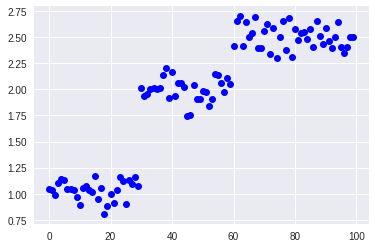

In [41]:
y1 = 1.0 * np.ones([30, 1]) + 0.1 * np.random.randn(30, 1)
y2 = 2.0 * np.ones([30, 1]) + 0.1 * np.random.randn(30, 1)
y3 = 2.5 * np.ones([40, 1]) + 0.1 * np.random.randn(40, 1)

y = np.vstack([y1, y2, y3])

plt.plot(y, "bo")

### データ全体
データ全体は下記のようになる。
今回は特に意味のないデータなのだが、特徴量が連続であったり離散であったり、カテゴリ値であったり、様々なものが混ざっているケースが通常データ解析の場面では当たり前である。

In [85]:
df["outputs"] = y
df_transed["outputs"] = y
df_transed.head()

,feature1,feature2,feature3,feature4,feature5,discreate_feature,categori_feature_0.0,categori_feature_1.0,categori_feature_2.0,outputs
0,0.601079,0.278265,0.196967,-0.226083,-0.231702,2.0,0,1,0,1.042512
1,0.441099,1.074026,0.185914,-0.200806,-0.588992,3.0,0,1,0,1.034850
2,-0.675723,-0.006905,1.726680,-0.614718,-0.374511,3.0,0,1,0,0.990466
3,-0.285753,-0.113059,1.201374,-0.497563,-0.540697,1.0,0,0,1,1.106642
4,0.283813,-0.451710,0.244722,-0.545862,-0.405046,0.0,0,0,1,1.138304


### モデルと学習
今回は適当な数の中間層を持つDNNをつかう。特に意味はない。

In [162]:
model = tf.keras.Sequential([
    L.InputLayer([9]),
    L.Dense(20, activation=tf.nn.relu),
    L.Dense(20, activation=tf.nn.relu),
    L.Dense(20, activation=tf.nn.relu),
    L.Dense(20, activation=tf.nn.relu),
    L.Dense(20, activation=tf.nn.relu),
    L.Dense(20, activation=tf.nn.relu),
    L.Dense(20, activation=tf.nn.relu),
    L.Dense(20, activation=tf.nn.relu),
    L.Dense(20, activation=tf.nn.relu),
    L.Dense(1)
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 20)                200       
_________________________________________________________________
dense_31 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_32 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_33 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_34 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_35 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_36 (Dense)             (None, 20)                420       
__________

### 学習の設定
下記のコードで学習の設定が可能。

ここで決めるのはオプティマイザーと損失関数である。学習コードを書くのが面倒なので、keras APIを使う。eager_executionなのでmodel.compile自体も動的に何度でもやり直せる（途中で学習率を変えたり、損失関数を変えたり出来る）。

In [0]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(1e-4),
              loss=tf.losses.mean_squared_error)

### 学習
実は今回の下記の学習では、学習が上手く進まない。lossが必ず停滞する。その停滞に応じて、上のコードの学習率を書き換えて再度下記のコードで学習を行うことで、なんとかlossを下げて見て欲しい（ちゃんと学習は続きから行われる）。結構面倒臭い。

In [157]:
model.fit(x=df_transed.loc[:, df_transed.columns != 'outputs'],
          y=df_transed['outputs'],
          epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0538
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0537
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0537
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0536
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0535
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0535
Epoch 7/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0534
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0534
Epoch 9/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0533
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0533
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0532
Epoch 12/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0532
Epoch 13/100
4/4 [==============================] - 0s 8ms/st

### 学習結果可視化
元のデータを青、学習後のデータを赤とする。
頑張ってみたが「学習データでさえ」下記の結果となった。今回は使ったデータに特に意味はなく、ある意味「秩序のない学習のしどころがわからないデータ」だったため、学習が上手く行かなかったのかもしれない。

In [0]:
y_predict = model.predict(df_transed.loc[:, df_transed.columns != 'outputs'])

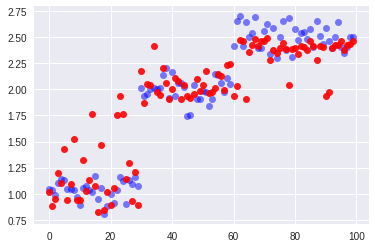

In [163]:
plt.plot(df_transed['outputs'], "bo", alpha=0.5)
plt.plot(y_predict, "ro", alpha=0.9)

### 総括
今回は無意味なデータを使った。本当に意味のあるデータを使っていれば、ちゃんと良く利いてくる特徴量を上手く学習することが可能なはずである。だから、上記のように「学習データでさえ」完璧に学習できなかった、ということは起こらないと思いたい。

しかし、それにしても、今回の無秩序なデータに対してぶつけたモデルも反則的にパラメータの数が多く「問題を丸暗記できる程度の自由度」を有している。なので、あとは無秩序に見えるデータをどのように上手く学習させるか（丸暗記させるか）という話になるが、それが結構面倒であることを見た。

実データに対しては、丸暗記は許されずテストデータに対しても性能が発揮されなければならない。実データならば（ちゃんと収集していれば）無秩序ということはなく、学習のしどころが（人間に分かるかはともかくとして）存在するはずである。<b>データの秩序は整う一方で、求められる学習のクオリティは更に高いものとなる。</b>ということである。その際の学習率を含めたハイパーパラメータの調整の困難さが、どのように変化するのかは謎である。


### ハイパーパラメータの自動調整
ハイパーパラメータの自動調整を行うアプリケーションは意外と多い。その中でもPFN製のOptunaは使いやすい。下記に利用例を載せた。

[Optuna tutorial](https://github.com/hellocybernetics/TensorFlow_Eager_Execution_Tutorials/blob/master/tutorials/99_others/hyper_parameter_optimization_using_optuna.ipynb)